# HSMA 3C: Exercise 2 - Getting travel times from an API

Import the required packages.

In [2]:
import geopandas
import pandas as pd
import matplotlib.pyplot as plt
import routingpy
import contextily as cx

## Getting and plotting travel time matrices

The code below will 
- create a dataframe of the population-weighted centroids of York and Hull
- create a dataframe of the LSOA boundaries of York and Hull
- create a map showing the LSOA boundaries of York and Hull with the population-weighted centroids of each LSOA

First, read through this code and try to understand what it is doing.

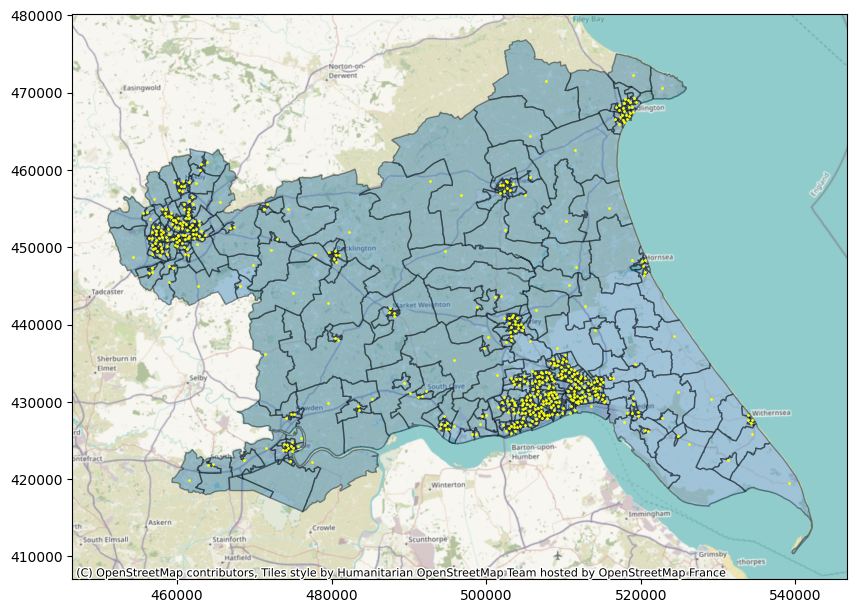

In [11]:
lsoa_centroids_2021 = pd.merge(
    geopandas.read_file("../datasets/LLSOA_Dec_2021_PWC_for_England_and_Wales_2022_1503021234159904115.geojson"),
    geopandas.read_file("../datasets/Lower_layer_Super_Output_Areas_2021_EW_BGC_V3_-3320468682147951291.geojson")[["LSOA21CD", "LSOA21NM"]],
    left_on="LSOA21CD",
    right_on="LSOA21CD"
).sort_values('LSOA21NM')

lsoa_centroids_2021_york = lsoa_centroids_2021[lsoa_centroids_2021["LSOA21NM"].str.contains("York|Hull")]

lsoa_boundaries_2021 = geopandas.read_file("../datasets/Lower_layer_Super_Output_Areas_2021_EW_BGC_V3_-3320468682147951291.geojson")
lsoa_boundaries_2021_york = lsoa_boundaries_2021[lsoa_boundaries_2021["LSOA21NM"].str.contains("York|Hull")]

ax = lsoa_boundaries_2021_york.plot(alpha=0.4, edgecolor='black', figsize=(10,8))
lsoa_centroids_2021_york.plot(color="yellow", ax=ax, markersize=1)

cx.add_basemap(ax, crs=lsoa_boundaries_2021_york.crs.to_string(), zoom=10)

Load in the potential clinic locations from **york_clinics.csv**.

Convert the centroids from EPSG:27700 (northings/eastings) to EPSG:3857 (lat/long) as this is the right format for the routingpy service.

## Getting and plotting isochrone data